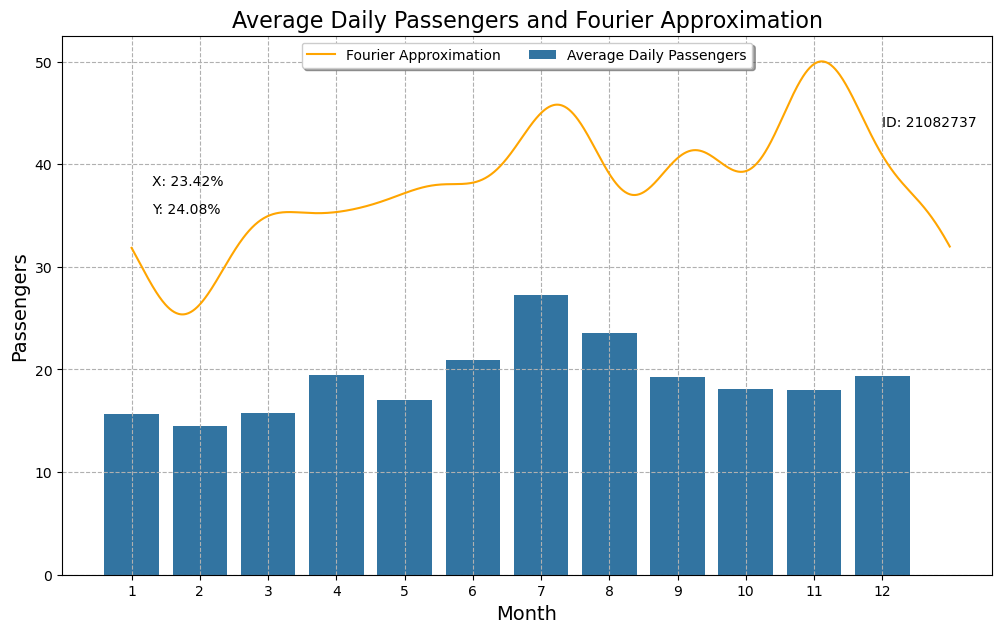

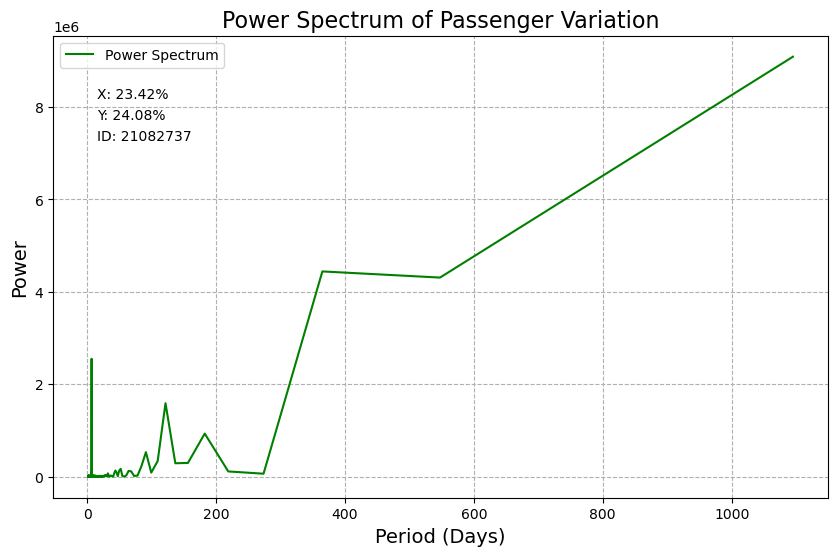

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'airline3.csv'
data = pd.read_csv(file_path)

# Ensure the "Date" column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract relevant columns
dates = data['Date']
passengers = data['Number'].to_numpy()  # 'Number' column holds daily passenger numbers
revenue = data['Price'] * data['Number']  # Calculate revenue (Price * Number of passengers)

# Part B: Fourier Transform of Daily Passenger Variation using numpy
n = len(passengers)
frequencies = np.fft.fftfreq(n, d=1)[:n // 2]  # Positive frequencies only
fourier_transform = np.fft.fft(passengers)[:n // 2]
magnitude = np.abs(fourier_transform)

# Part C: Average Daily Passengers by Month
data['Month'] = data['Date'].dt.month
monthly_avg_passengers = data.groupby('Month')['Number'].mean()

# ===================== Part D: Create Figure 1 =====================
plt.figure(figsize=(12, 7))

# Use pastel color palette for the bar chart
sns.barplot(x=range(1, 13), y=monthly_avg_passengers, label="Average Daily Passengers")

# Fourier Series Approximation
t = np.linspace(0, n - 1, n)  # Time array aligned with passenger data
fourier_series = np.zeros_like(t, dtype=float)

# Limit Fourier series to first 8 terms
for k in range(min(8, len(frequencies))):
    a_k = 2 * np.real(fourier_transform[k]) / n
    b_k = -2 * np.imag(fourier_transform[k]) / n
    omega_k = 2 * np.pi * frequencies[k]
    fourier_series += a_k * np.cos(omega_k * t) + b_k * np.sin(omega_k * t)

# Plot Fourier approximation
plt.plot(t / (n / 12), fourier_series, color='orange', label='Fourier Approximation')

# Set labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Passengers', fontsize=14)
plt.title('Average Daily Passengers and Fourier Approximation', fontsize=16)

# Add ID to the plot
plt.text(11, max(monthly_avg_passengers) * 1.60, 'ID: 21082737', fontsize=10)

# Place legend outside the plot
plt.legend(loc='upper center', fancybox=True, shadow=True, ncol=2)

# Add grid
plt.grid(linestyle='--')

# Save the figure
plt.savefig('Figure1.png', bbox_inches='tight')

# ===================== Part F: Calculate X and Y =====================
# X: Fraction of revenue from autumn months (Sept, Oct, Nov)
autumn_months = [9, 10, 11]
autumn_data = data[data['Month'].isin(autumn_months)]
total_revenue = data['Price'] * data['Number']  # Total revenue for all months (in Euros)
autumn_revenue = autumn_data['Price'] * autumn_data['Number']  # Revenue from autumn months (in Euros)
value_x = (autumn_revenue.sum() / total_revenue.sum()) * 100  # Fraction of revenue in autumn months

# Y: Fraction of passengers in autumn months
total_passengers = data['Number'].sum()  # Total number of passengers
autumn_passengers = autumn_data['Number'].sum()  # Passengers in autumn months
value_y = (autumn_passengers / total_passengers) * 100  # Fraction of passengers in autumn months

# Add X and Y to Figure 1 inside the plot area
plt.text(0.3, max(monthly_avg_passengers) * 1.39, f'X: {value_x:.2f}%', fontsize=10, color='black')
plt.text(0.3, max(monthly_avg_passengers) * 1.29, f'Y: {value_y:.2f}%', fontsize=10, color='black')

# ===================== Part E: Power Spectrum =====================
valid_indices = frequencies > 0  # Skip zero frequency
valid_frequencies = frequencies[valid_indices]
valid_power_spectrum = magnitude[valid_indices]**2

plt.figure(figsize=(10, 6))
plt.plot(1 / valid_frequencies, valid_power_spectrum, label='Power Spectrum', color='green')
plt.xlabel('Period (Days)', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.title('Power Spectrum of Passenger Variation', fontsize=16)

# Annotate the plot with X and Y (Figure 2), placing inside the plot
plt.text(1 / valid_frequencies[-1] * 8.0, max(valid_power_spectrum) * 0.9, f'X: {value_x:.2f}%', fontsize=10, color='black')
plt.text(1 / valid_frequencies[-1] * 8, max(valid_power_spectrum) * 0.85, f'Y: {value_y:.2f}%', fontsize=10, color='black')
plt.text(1 / valid_frequencies[-1] * 8, max(valid_power_spectrum) * 0.80, 'ID: 21082737', fontsize=10, color='black')

plt.legend()
plt.grid(linestyle='--')

# Save the second figure
plt.savefig('Figure2.png', bbox_inches='tight')

# Show plots
plt.show()


In [3]:
data.head()

,Date,Number,Price,Month
0,2021-01-01,4.6707,45.19,1
1,2021-01-02,4.8544,45.30,1
2,2021-01-03,2.8823,44.16,1
3,2021-01-04,5.6255,45.74,1
4,2021-01-05,8.3329,47.30,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1095 non-null   datetime64[ns]
 1   Number  1095 non-null   float64       
 2   Price   1095 non-null   float64       
 3   Month   1095 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 30.1 KB


In [13]:
data.describe()

,Date,Number,Price,Month
count,1095,1095.000000,1095.000000,1095.000000
mean,2022-07-02 00:00:00,19.099999,53.510658,6.526027
min,2021-01-01 00:00:00,1.578300,43.410000,1.000000
25%,2021-10-01 12:00:00,14.970550,51.130000,4.000000
50%,2022-07-02 00:00:00,18.816100,53.350000,7.000000
75%,2023-04-01 12:00:00,23.040200,55.785000,10.000000
max,2023-12-31 00:00:00,46.296600,69.190000,12.000000
std,NaN,7.220485,4.162510,3.449427
